In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

    -   `root` is the path where the train/test data is stored,  
    -   `train` specifies training or test dataset,  
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.  
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
# training_data = datasets.

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [5]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We


In [6]:
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

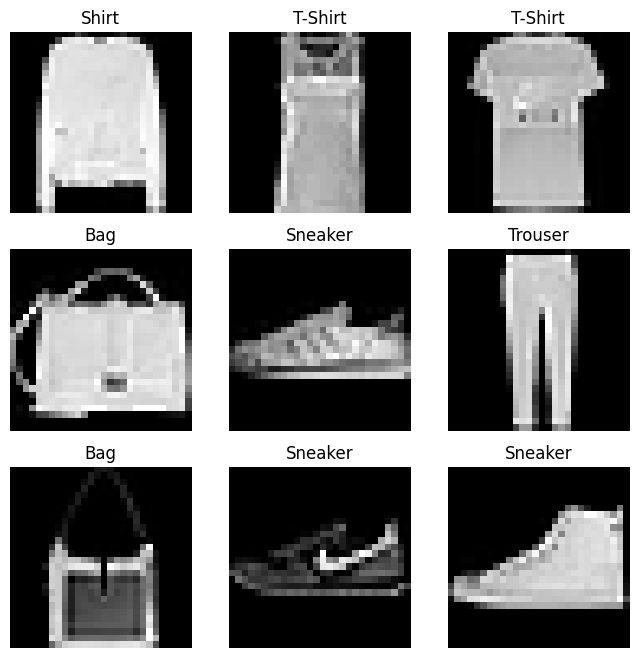

In [8]:
# use `matplotlib` to visualize some samples in our training data.
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

------------------------------------------------------------------------


In [9]:
import os
import pandas as pd
from torchvision.io import read_image

Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


In [11]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))


print(f"Feature batch shape: {train_features.size()}")

print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [12]:
train_features[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
img_unsqueezed = train_features[0]

In [14]:
img_unsqueezed.size()

torch.Size([1, 28, 28])

In [15]:
img = train_features[0].squeeze()  # Returns a tensor with all specified dimensions of input of size 1 removed.

In [16]:
img.size()

torch.Size([28, 28])

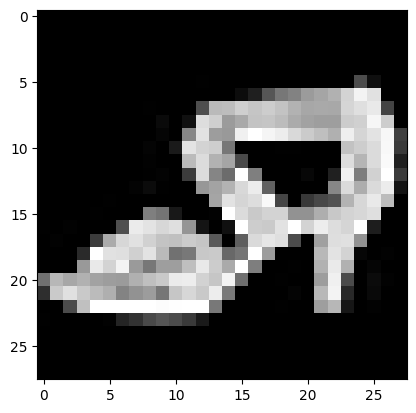

Label: 5


In [17]:
label = train_labels[0]
plt.imshow(img, cmap="gray")  # cmp this is not pytorch.
# plt.imshow(img)
plt.show()
print(f"Label: {label}")

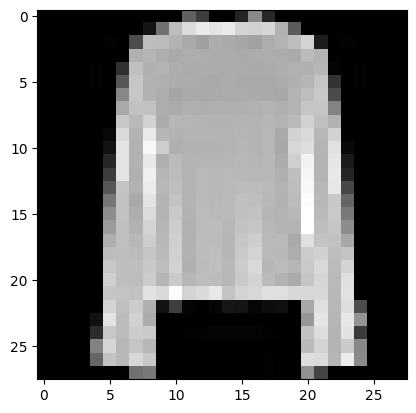

Label: 6


In [18]:
img = train_features[5].squeeze()
label = train_labels[5]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")